In [1]:
import FinancialMachineLearning as fml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('./Data/IVE_tickbidask.parq')
df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2018-10-05 15:59:59,116.20,116.18,116.19,2000,2000,232400.00
2018-10-05 15:59:59,116.20,116.18,116.19,3900,3900,453180.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48


<AxesSubplot:xlabel='price'>

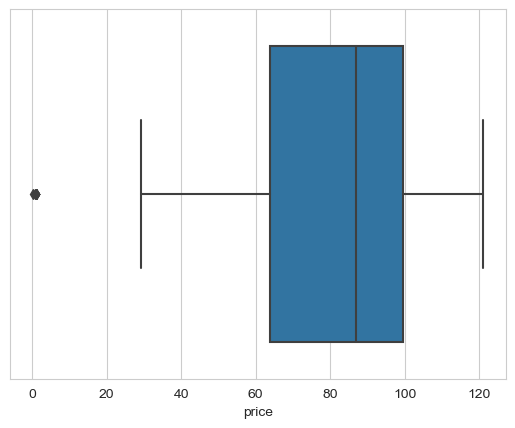

In [3]:
sns.boxplot(df.price)

In [4]:
mad = fml.madOutlier(df.price.values.reshape(-1, 1))

86.96
[36.17 36.25 36.21 ... 29.26 29.26 29.26]
[1.41225268 1.41537627 1.41381447 ... 1.14245268 1.14245268 1.14245268]


In [5]:
df.loc[mad]

,price,bid,ask,size,v,dv
dates,,,,,,
2010-05-06 14:49:07,0.11,0.10,44.03,500,500,55.0
2010-05-06 14:53:30,1.10,1.10,30.28,2600,2600,2860.0
2010-05-06 14:55:32,1.10,1.10,50.57,300,300,330.0
2010-05-06 14:55:32,1.10,1.10,50.57,100,100,110.0
2010-05-06 14:55:32,1.10,1.00,50.57,200,200,220.0
2010-05-06 14:55:32,1.10,1.00,50.57,700,700,770.0
2010-05-06 14:55:32,1.10,1.00,50.57,1200,1200,1320.0
2010-05-06 14:55:32,1.10,0.55,50.57,500,500,550.0
2010-05-06 14:55:32,1.10,0.55,50.57,100,100,110.0


In [6]:
df = df.loc[~mad]
df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2018-10-05 15:59:59,116.20,116.18,116.19,2000,2000,232400.00
2018-10-05 15:59:59,116.20,116.18,116.19,3900,3900,453180.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48


### Chapter 2. Financial Data Structure

#### Exercise 1
E-mini S&P 500 선물 데이터 계열에 대해

**(a)** Tick, Volume, Dollar Bar를 구성하라. ETF트릭을 사용해 롤을 다뤄 보라.

In [7]:
tick_M = 100
tick_df = fml.BarSampling(df, 'price', tick_M, tick = True).drop_duplicates().dropna()
tick_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:53:14,51.1500,51.15,51.18,100,100,5115.0000
2009-09-28 10:02:52,51.2500,51.24,51.26,2000,2000,102500.0000
2009-09-28 10:22:24,51.1961,51.19,51.20,1100,1100,56315.7100
2009-09-28 10:38:44,51.3650,51.36,51.36,100,100,5136.5000
2009-09-28 11:24:29,51.3200,51.32,51.33,2000,2000,102640.0000
...,...,...,...,...,...,...
2018-10-05 14:21:02,116.1167,116.11,116.12,100,100,11611.6700
2018-10-05 14:56:39,116.0600,116.06,116.07,274,274,31800.4400
2018-10-05 15:37:49,116.0565,116.05,116.06,559,559,64875.5835


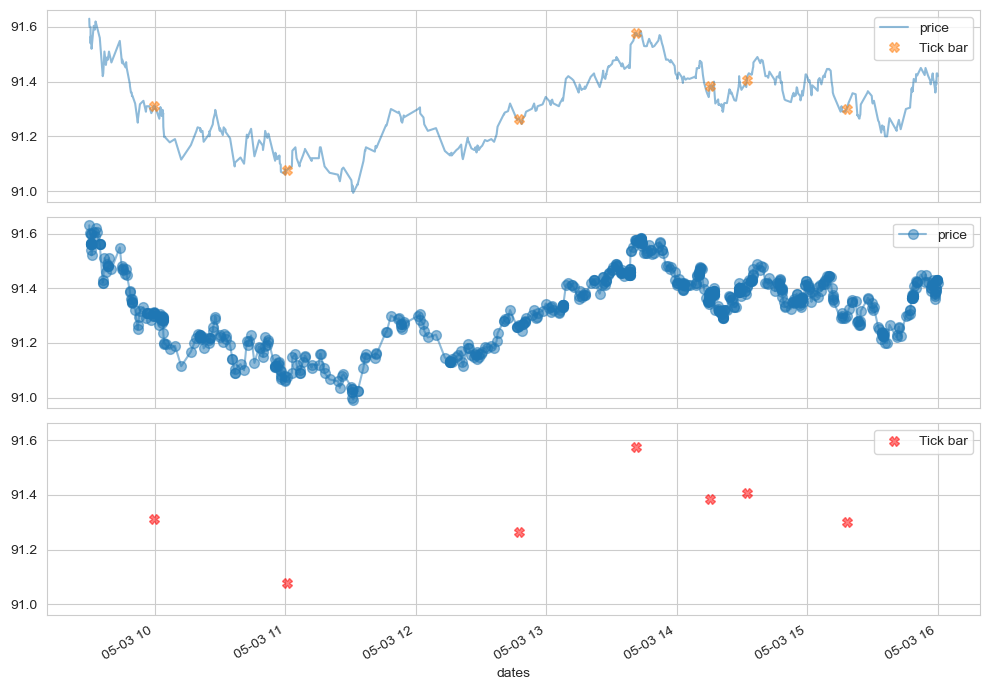

In [8]:
xDate = '2016-05-03'
xdf, xtdf = fml.select_sample_data(df, tick_df, 'price', xDate)
fml.plotSampleData(xdf, xtdf, 'Tick bar', alpha = 0.5, markersize = 7)

In [9]:
volume_M = 10000
volume_df = fml.BarSampling(df, 'v', volume_M)
volume_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:44:09,50.9100,50.91,50.92,1100,1100,56001.00
2009-09-28 09:46:35,51.0700,51.05,51.07,3300,3300,168531.00
2009-09-28 09:52:47,51.1300,51.13,51.14,2000,2000,102260.00
2009-09-28 09:54:36,51.1300,51.11,51.13,400,400,20452.00
2009-09-28 09:54:41,51.1400,51.13,51.14,700,700,35798.00
...,...,...,...,...,...,...
2018-10-05 15:58:08,116.1800,116.17,116.18,451,451,52397.18
2018-10-05 15:59:16,116.1969,116.19,116.20,800,800,92957.52
2018-10-05 15:59:46,116.2100,116.19,116.21,900,900,104589.00


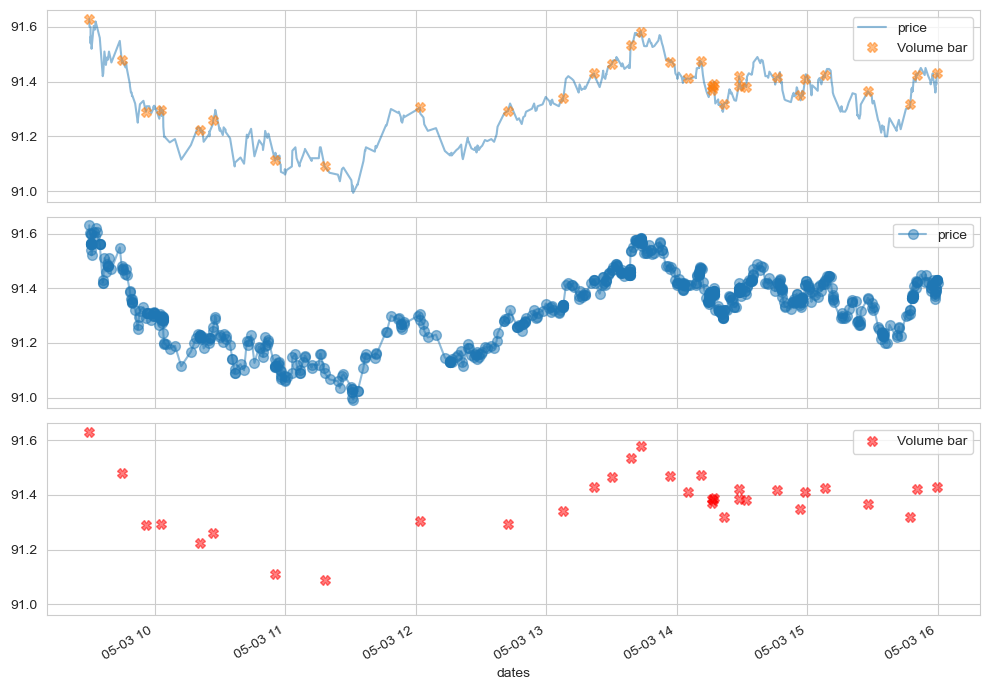

In [10]:
xdf, xtdf = fml.select_sample_data(df, volume_df, 'price', xDate)
fml.plotSampleData(xdf, xtdf, 'Volume bar', alpha = 0.5, markersize = 7)

In [11]:
dollar_M = 1000000
dollar_df = fml.BarSampling(df, 'dv', dollar_M)
dollar_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


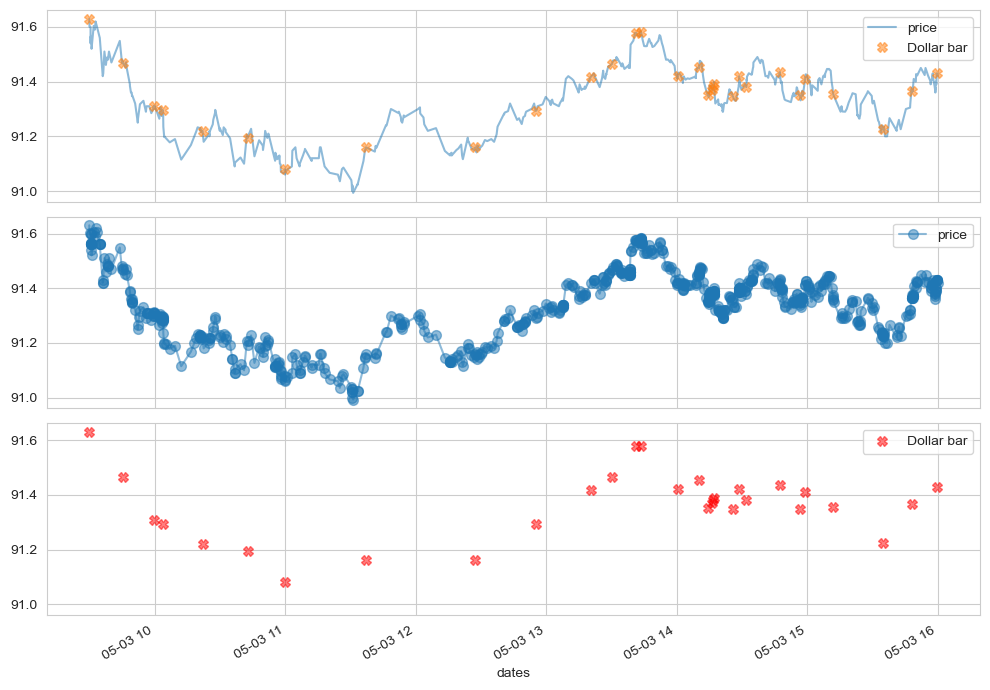

In [12]:
xdf, xtdf = fml.select_sample_data(df, dollar_df, 'price', xDate)
fml.plotSampleData(xdf, xtdf, 'Dollar bar', alpha = 0.5, markersize = 7)

ETF trick : 추후 추가 (OHLC없음)

**(b)** 틱, 거래량, 달러 바의 주 단위 발생 건수를 알아보라. 이를 시계열로 도식화하라. 어떤 바 형태가 주별 횟수에 있어 가장 안정적인가? 그 이유는 무엇인가?

In [13]:
tc = fml.scale(fml.count_bars(tick_df))
vc = fml.scale(fml.count_bars(volume_df))
dc = fml.scale(fml.count_bars(dollar_df))
dfc = fml.scale(fml.count_bars(df))

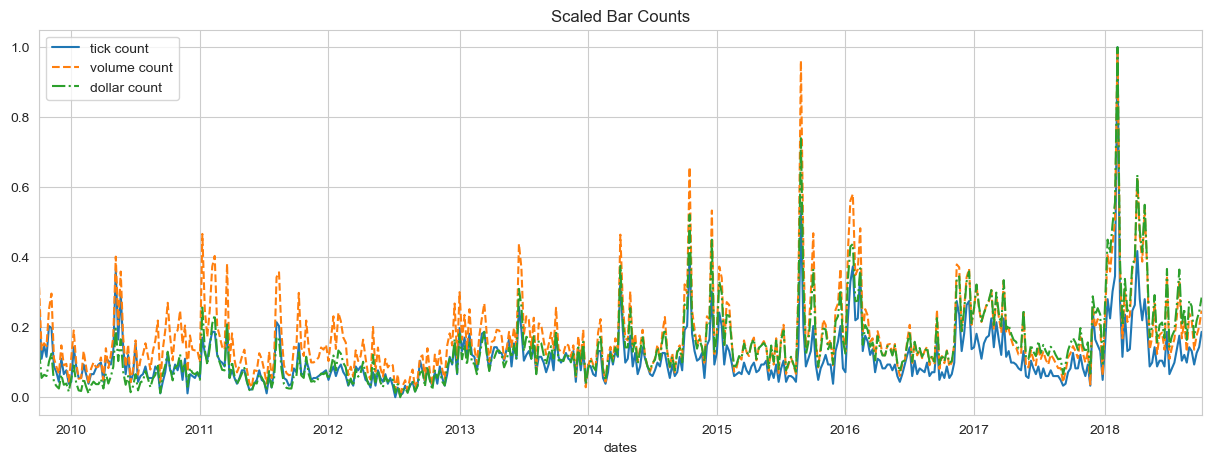

In [14]:
fml.plot_bar_counts(tc, vc, dc)

In [15]:
print(tc.std(), vc.std(), dc.std())

0.08003244478282465 0.11520268873440069 0.10959356576261096


tick bar가 가장 안정적인 것으로 나온다. 왜지...

**(c)** 세 가지 바 형태의 수익률의 상관관계를 계산하라. 어떠한 바 기법이 가장 낮은 계열 상관관계를 가지는가?

In [16]:
tr = fml.getReturns(tick_df.price)
vr = fml.getReturns(volume_df.price)
dr = fml.getReturns(dollar_df.price)
df_ret = fml.getReturns(df.price)

In [17]:
bar_types = ['tick','volume','dollar','sampling x']
bar_ret = [tr, vr, dr, df_ret]
autocorr = fml.get_test_stats(bar_types, bar_ret, pd.Series.autocorr)

In [18]:
autocorr

,sample size,autocorr_stat
tick,14161.0,0.061935
volume,60264.0,-0.017485
dollar,50765.0,-0.123141
sampling x,1416199.0,-0.092242


In [19]:
autocorr.abs()

,sample size,autocorr_stat
tick,14161.0,0.061935
volume,60264.0,0.017485
dollar,50765.0,0.123141
sampling x,1416199.0,0.092242


상관관계 : volume bar가 가장 적게 나왔다

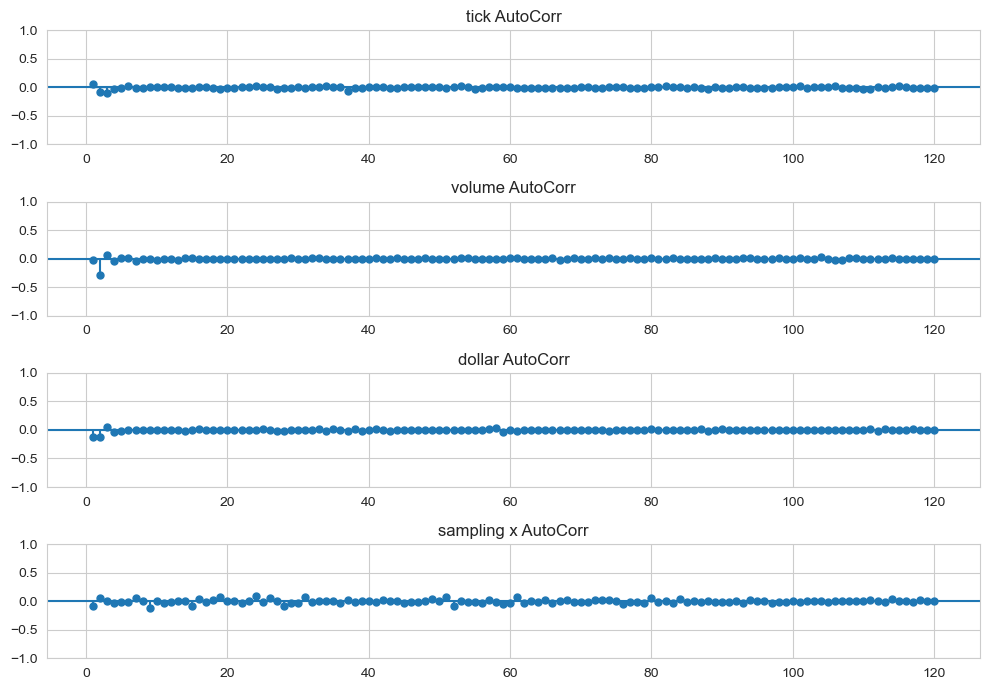

In [20]:
fml.plot_autocorr(bar_types, bar_ret)

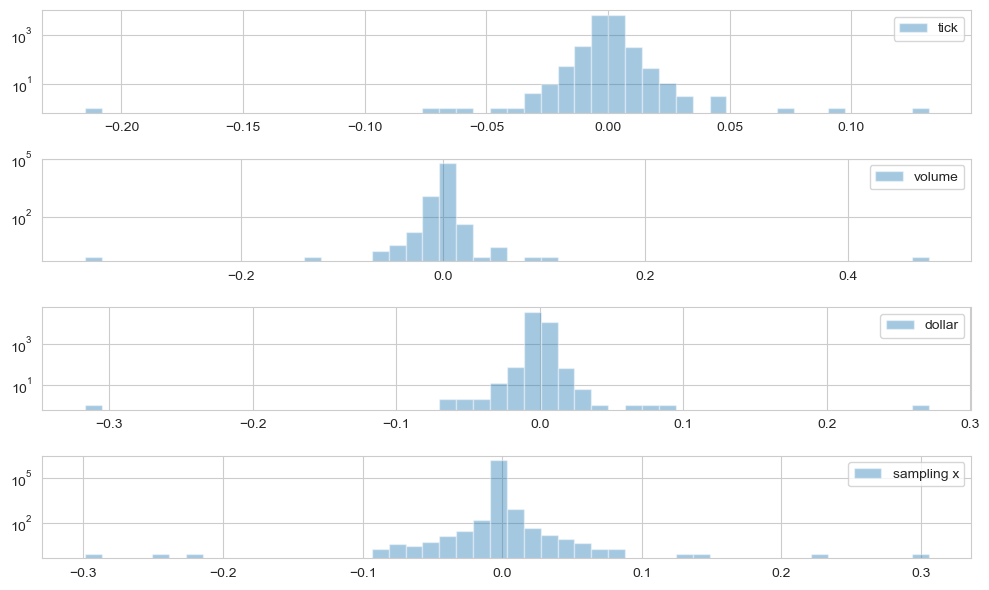

In [21]:
fml.plot_hist(bar_types, bar_ret)

dollar bar의 정규성, AutoCorrelation이 가장 안정적인 형태로 나온다.
상관관계의 p value가 평상의 기각역을 조금 벗어나긴 하지만, 통계적 특성으로 미루어 볼 때 dollar bar가 가장 안정적인 것으로 보인다

**(d)** 바 시리즈를 월별 부분 집합으로 나눠라. 모든 바 형식의 모든 부분 집합에 대한 수익률 분산을 계산하라. 이 분산의 분산을 계산하라. 어떤 방법이 가장 적은 분산들의 분산을 가지는가?

In [22]:
def partition_monthly(s) : return s.resample('1M').var()

In [23]:
tr_rs = partition_monthly(tr)
vr_rs = partition_monthly(vr)
dr_rs = partition_monthly(dr)
df_rs = partition_monthly(df_ret)

monthly_vars = [tr_rs, vr_rs, dr_rs, df_rs]

In [24]:
fml.get_test_stats(bar_types, monthly_vars, np.var)

,sample size,var_stat
tick,110.0,1.898539e-09
volume,110.0,2.710183e-09
dollar,110.0,2.099271e-09
sampling x,110.0,5.295761e-12


tick bar가 가장 적은 분산의 분산을 가진다

**(e)** Jarque Bera 정규성 검사를 세 가지 바 형식의 수익률에 대해 적용해 보라. 가장 낮은 테스트 통계값을 갖는 방법은 무엇인가?

In [25]:
import scipy.stats as stats
fml.get_test_stats(bar_types, bar_ret, stats.jarque_bera)

,sample size,jarque_bera_stat
tick,14161,"(130236072.61734918, 0.0)"
volume,60264,"(327763258109.8694, 0.0)"
dollar,50765,"(54049859719.39038, 0.0)"
sampling x,1416199,"(206784897320994.84, 0.0)"


tick bar가 가장 낮은 테스트 통계값을 갖는것으로 보인다

#### Exercise 2

E-mini S&P 500 future tick data의 계열의 달러 바와 달러 불균형 바를 계산하라. 어떤 바 형식이 더 큰 계열 상관관계를 보이는가? 그 이유는 무엇인가?

In [26]:
tidx = fml.getImbalance(df.price.values) * df.dv.iloc[1:]
tidx

dates
2009-09-28 09:30:00     -32352.98
2009-09-28 09:31:32       5075.00
2009-09-28 09:31:33       5075.00
2009-09-28 09:31:50      15225.00
2009-09-28 09:31:51      15225.00
                          ...    
2018-10-05 15:59:59     232400.00
2018-10-05 15:59:59     453180.00
2018-10-05 16:00:00    4983978.48
2018-10-05 16:10:00          0.00
2018-10-05 18:30:00          0.00
Name: dv, Length: 1416199, dtype: float64

In [27]:
win_size = tidx.shape[0] // 1000
win_size

1416

In [28]:
expected_barsize = tidx.ewm(win_size).mean()
expected_barsize

dates
2009-09-28 09:30:00   -32352.980000
2009-09-28 09:31:32   -13632.384285
2009-09-28 09:31:33    -7392.186750
2009-09-28 09:31:50    -1731.901047
2009-09-28 09:31:51     1664.269246
                           ...     
2018-10-05 15:59:59     7577.982410
2018-10-05 15:59:59     7892.451018
2018-10-05 16:00:00    11404.156049
2018-10-05 16:10:00    11396.107950
2018-10-05 18:30:00    11388.065531
Name: dv, Length: 1416199, dtype: float64

In [29]:
E_T = pd.Series(range(tidx.shape[0]),index = tidx.index).ewm(win_size).mean()
E_T

dates
2009-09-28 09:30:00    0.000000e+00
2009-09-28 09:31:32    5.001765e-01
2009-09-28 09:31:33    1.000471e+00
2009-09-28 09:31:50    1.500882e+00
2009-09-28 09:31:51    2.001412e+00
                           ...     
2018-10-05 15:59:59    1.414778e+06
2018-10-05 15:59:59    1.414779e+06
2018-10-05 16:00:00    1.414780e+06
2018-10-05 16:10:00    1.414781e+06
2018-10-05 18:30:00    1.414782e+06
Length: 1416199, dtype: float64

In [30]:
df0 = (pd.DataFrame().assign(bs=tidx)
       .assign(E_T = E_T)
       .assign(E_bs = expected_barsize)
       .assign(absMul = lambda df: df.E_T * np.abs(df.E_bs))
       .assign(absTheta = tidx.cumsum().abs()))
df0

,bs,E_T,E_bs,absMul,absTheta
dates,,,,,
2009-09-28 09:30:00,-32352.98,0.000000e+00,-32352.980000,0.000000e+00,3.235298e+04
2009-09-28 09:31:32,5075.00,5.001765e-01,-13632.384285,6.818598e+03,2.727798e+04
2009-09-28 09:31:33,5075.00,1.000471e+00,-7392.186750,7.395666e+03,2.220298e+04
2009-09-28 09:31:50,15225.00,1.500882e+00,-1731.901047,2.599380e+03,6.977980e+03
2009-09-28 09:31:51,15225.00,2.001412e+00,1664.269246,3.330888e+03,8.247020e+03
...,...,...,...,...,...
2018-10-05 15:59:59,232400.00,1.414778e+06,7577.982410,1.072116e+10,1.235259e+09
2018-10-05 15:59:59,453180.00,1.414779e+06,7892.451018,1.116607e+10,1.234806e+09
2018-10-05 16:00:00,4983978.48,1.414780e+06,11404.156049,1.613437e+10,1.229822e+09


array([<AxesSubplot:xlabel='dates'>, <AxesSubplot:xlabel='dates'>],
      dtype=object)

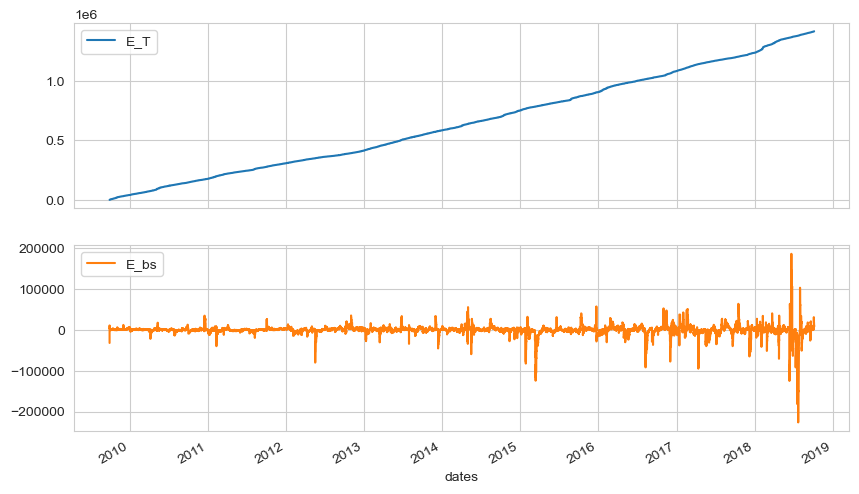

In [31]:
df0[['E_T','E_bs']].plot(subplots = True,figsize = (10,6))

In [32]:
df0.describe()/1000

,bs,E_T,E_bs,absMul,absTheta
count,1416.199000,1416.199000,1416.199000,1.416199e+03,1.416199e+03
mean,-0.868396,706.685330,-0.876148,5.471895e+06,3.240696e+05
std,678.087064,408.817559,12.981937,1.418429e+07,3.164342e+05
min,-244194.944400,0.000000,-226.301289,0.000000e+00,3.537070e-01
25%,-19.388268,352.633500,-2.780387,4.454746e+05,4.764046e+04
50%,-4.959100,706.683000,-0.075123,1.636679e+06,1.295138e+05
75%,19.188733,1060.732500,2.665891,4.849096e+06,5.892219e+05
max,289491.800000,1414.782000,185.312974,3.116753e+08,1.401899e+06


<AxesSubplot:>

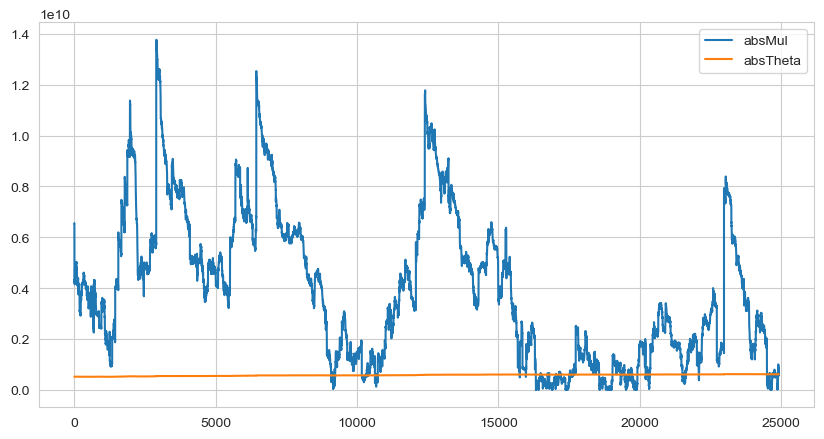

In [33]:
(df0.loc['2016-01',['absMul','absTheta']].reset_index(drop = True).plot(figsize = (10,5)))

In [34]:
bars = fml.getAggImalanceBar(df0)
test_imb_bars = (pd.DataFrame(bars,columns=['start','stop','Ts']).drop_duplicates())
test_imb_bars

,start,stop,Ts
0,2009-09-28 09:30:00,2009-09-28 09:30:00,1
1,2009-09-28 09:30:00,2009-09-28 09:31:32,2
2,2009-09-28 09:31:32,2009-09-28 09:31:33,2
3,2009-09-28 09:31:33,2009-09-28 09:31:50,2
4,2009-09-28 09:31:50,2009-09-28 09:31:51,2
...,...,...,...
1416161,2018-10-05 15:59:57,2018-10-05 15:59:59,10
1416162,2018-10-05 15:59:59,2018-10-05 15:59:59,9
1416170,2018-10-05 15:59:59,2018-10-05 16:00:00,10
1416171,2018-10-05 16:00:00,2018-10-05 16:10:00,2


<AxesSubplot:xlabel='stop'>

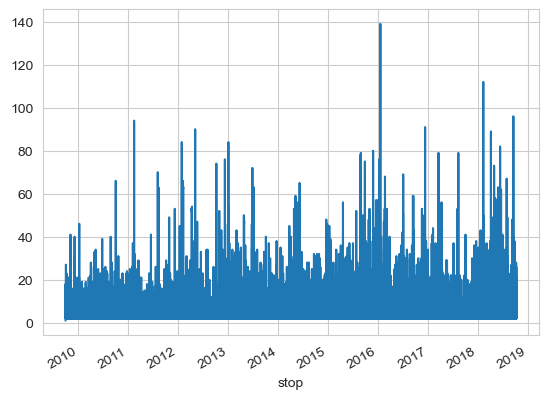

In [35]:
test_imb_bars.set_index('stop')['Ts'].plot()

In [36]:
dvImbBars = df.price.loc[test_imb_bars.stop].drop_duplicates()
dvImbBars

dates
2009-09-28 09:30:00     50.7900
2009-09-28 09:30:00     50.7100
2009-09-28 09:31:32     50.7500
2009-09-28 09:32:06     50.7800
2009-09-28 09:32:56     50.8226
                         ...   
2018-10-05 15:50:06    116.2341
2018-10-05 15:51:57    116.2321
2018-10-05 15:53:06    116.2232
2018-10-05 15:58:23    116.1875
2018-10-05 15:59:16    116.1969
Name: price, Length: 264611, dtype: float64

In [37]:
dvBar = dollar_df.price
dvBar

dates
2009-09-28 09:46:35     51.07
2009-09-28 09:53:49     51.14
2009-09-28 09:55:26     51.14
2009-09-28 10:02:52     51.25
2009-09-28 10:10:21     51.29
                        ...  
2018-10-05 15:58:23    116.19
2018-10-05 15:59:20    116.18
2018-10-05 15:59:55    116.19
2018-10-05 15:59:59    116.20
2018-10-05 16:00:00    116.22
Name: price, Length: 50766, dtype: float64

In [38]:
DollarRet = fml.getReturns(dollar_df.price)
DrImb = fml.getReturns(dvImbBars)

bar_types = ['dvBar', 'dvImb']
bar_rets = [DollarRet, DrImb]

In [39]:
fml.get_test_stats(bar_types, bar_rets, pd.Series.autocorr)

,sample size,autocorr_stat
dvBar,50765.0,-0.123141
dvImb,264610.0,-0.075539


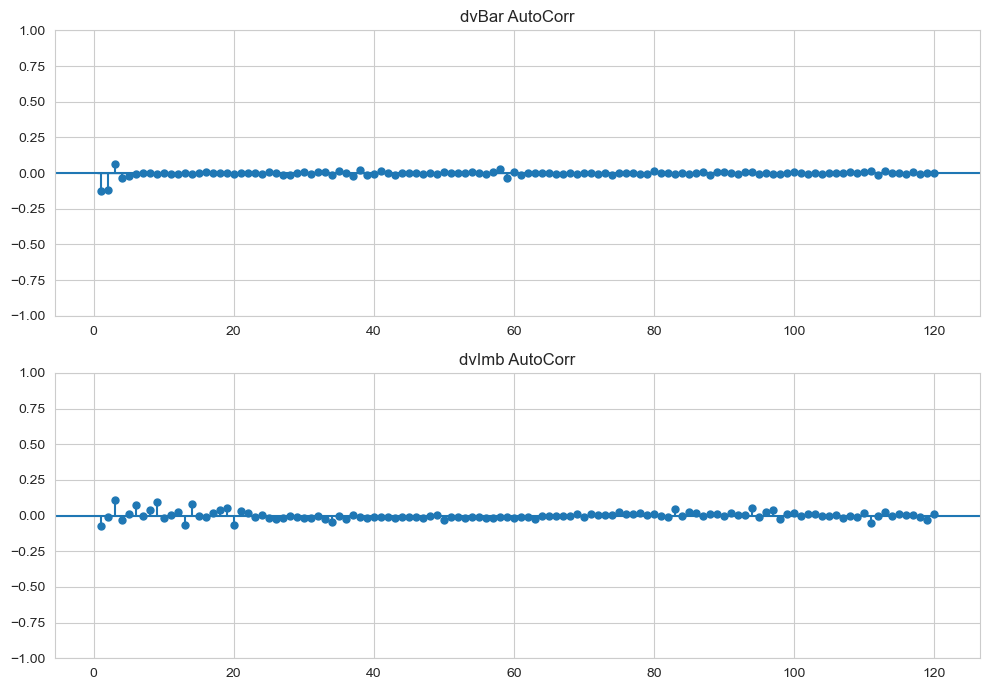

In [40]:
fml.plot_autocorr(bar_types, bar_rets)

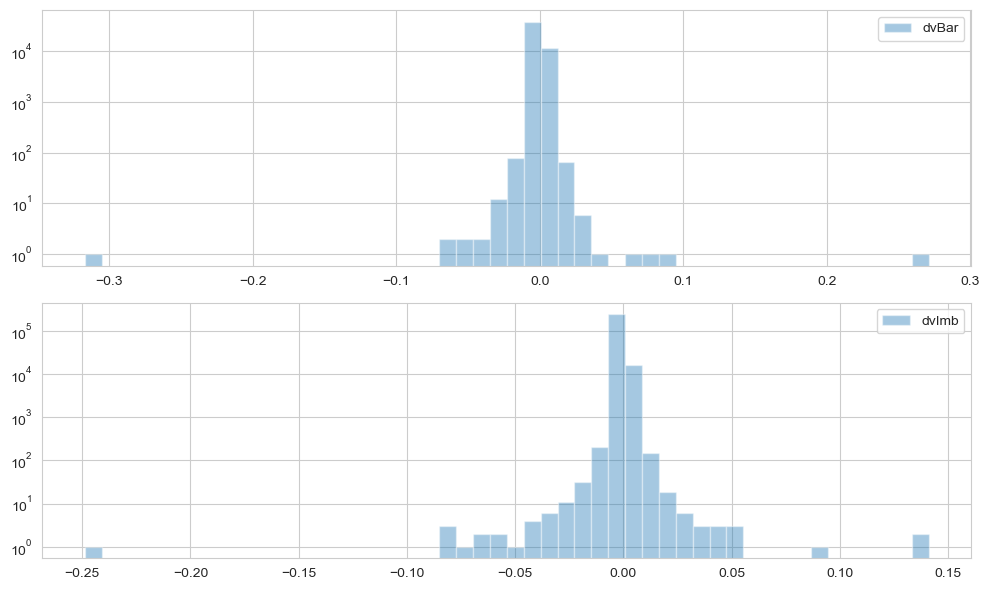

In [41]:
fml.plot_hist(bar_types, bar_rets)

In [42]:
fml.get_test_stats(bar_types, bar_rets, stats.jarque_bera)

,sample size,jarque_bera_stat
dvBar,50765,"(54049859719.39038, 0.0)"
dvImb,264610,"(878699264806.8214, 0.0)"


Dollar Bar가 더 큰 계열 상관관계를 보이고 있다.
Imbalance bar는 기대 균형값이 벗어날 때마다 Sampling을 하는 반면에 Dollar Bar는 Threshold를 자의적으로 정하고 그 값을 벗어날 때마다 sampling을 하게 되니 이 부분에서 불안정 해지는 것으로 보인다.

#### Exercise 4
E-mini S&P 500 future의 Dollar Bar를 구성하라.

**(a)** 롤링 이동 평균의 5% 폭 Bollinger Band를 계산하라. 밴드를 벗어나는 시간이 몇 개나 있는지 세어 보라.

In [48]:
dollar_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


In [57]:
day_dollar = dollar_df.resample('1D').mean().dropna()
day_dollar

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28,51.370952,51.360400,51.376000,1688.520000,1688.520000,8.669510e+04
2009-09-29,51.647979,51.622857,51.655714,710.214286,710.214286,3.666981e+04
2009-09-30,51.185043,51.173571,51.190000,602.142857,602.142857,3.074316e+04
2009-10-01,50.368746,50.333077,50.378077,6913.923077,6913.923077,3.478220e+05
2009-10-02,49.608350,49.600000,49.615000,1358.708333,1358.708333,6.747567e+04
...,...,...,...,...,...,...
2018-10-01,116.439740,116.432333,116.448667,5593.633333,5593.633333,6.514403e+05
2018-10-02,116.475050,116.463667,116.481667,2708.833333,2708.833333,3.154832e+05
2018-10-03,116.823782,116.815385,116.833077,1755.974359,1755.974359,2.051088e+05


<AxesSubplot:xlabel='dates'>

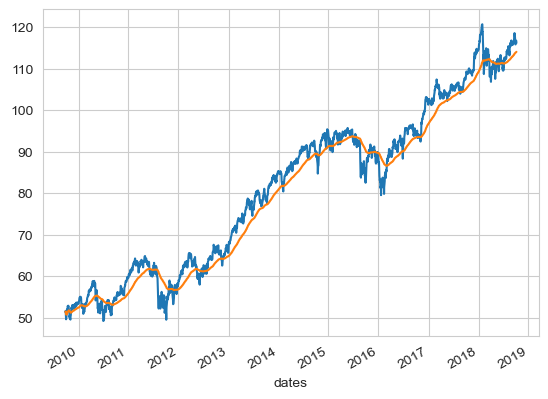

In [64]:
day_dollar.price.plot()
day_dollar.price.ewm(60).mean().plot()